In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

#**EJERCICIO 1**

---



$$M_n=n^3+n^2-\frac{n}{3}$$

$$S_n=\frac{n^3}{3}+\frac{n^2}{2}-\frac{5n}{6}$$

$$O_n=M_n+S_n$$

In [ ]:
def mn(n):
  return n**3 + n**2 - (1/3)*n

def sm(n):
  return (n**3)/3 + (n**2)/2 - (5/6)*n

Text(0, 0.5, '$\\#$ Operaciones')

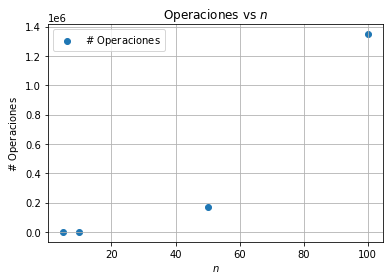

In [ ]:
n = np.array([5,10,50,100])
on = mn(n) + sm(n)
plt.scatter(n, on, label = "$\#$ Operaciones") #Puntos
plt.legend()
plt.grid()
plt.title("Operaciones vs $n$")
plt.xlabel("$n$")
plt.ylabel("$\#$ Operaciones")

Text(0, 0.5, '$\\#$ Operaciones')

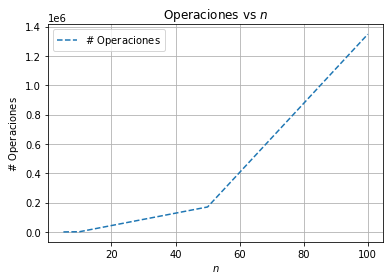

In [ ]:
plt.plot(n, on, "--", label = "$\#$ Operaciones") #Linea Punteada
plt.legend()
plt.grid()
plt.title("Operaciones vs $n$")
plt.xlabel("$n$")
plt.ylabel("$\#$ Operaciones")

De acuerdo con la expresión $O_n = M_n + S_n$ se observa que tanto $M_n$ como $S_n$ son polinomios de grado $3$ por lo que $O_n$ presenta un comportamiento cúbico. Si graficamos más valores de $n$ observariamos mejor el comportamiento cúbico de $O_n$

Esto, en pocas palabras, quiere decir que por cada incremento en la matriz, el número de operaciones que se deben realizar para solucionar el sistema crece de forma cubica. Si se tiene una matriz $A_{n\times n}$ y una matriz $B_{n+1\times n+1}$, para solucionar $B$ se deberán ejecutar el cubo de las operaciones realizadas por la matriz $A$

#**EJERCICIO 2**

---



#**Operaciones Elementales**

In [ ]:
def intercambio_filas(A,i,j):
  B = (np.copy(A)).astype("float64")
  B[[i,j]] = B[[j,i]]
  return B

def escalar_filas(A,i,lambda_):
  B = (np.copy(A)).astype("float64")
  B[i,:] = lambda_*B[i,:]
  return B

def suma_filas(A,i,j,lambda_):
  B = (np.copy(A)).astype("float64")
  B[i,:] += lambda_ * B[j,:]
  return B

#**Eliminación Gaussiana**

In [ ]:
def eliminacion_gaussiana(A):
  B = (np.copy(A)).astype("float64")
  m = len(B[:,0])
  n = len(B[0,:])

  for j in range(min(m,n)):
    for i in range(j,m): #Coloca Pivotes
      if B[i,j] != 0:
        B = intercambio_filas(B,i,j)
        break
    for i in range(j+1, m): #Reduce Matriz a Triangular Inferior
      if B[i,j] != 0:
        B =  suma_filas(B, i, j, -B[i,j]/B[j,j])
  for i in range(min(m,n)):
    if B[i,i] != 0:
      B = escalar_filas(B,i,1/B[i,i])
  return B

#**Sustitución Regresiva - Gauss**

In [ ]:
def solucion_gauss(A,b):
  start = time.process_time()
  n = len(A[0,:])
  B = eliminacion_gaussiana(np.c_[A,b]) #Realiza sustitución regresiva a partir de la matriz obtenida por ELiminación Gaussiana
  A_prima = B[:,0:n]
  b_prima = B[:,-1]
  x = np.zeros(len(A[:,0]))
  
  for i in range(n-1, 0-1, -1):
    if A_prima[i,i] == 0:
      x[i] = 2 #Matriz LD (Se puede modificar)
    else:
      x[i] = (b_prima[i] - sum(A_prima[i,i+1:n]*x[i+1:n]))/(A_prima[i,i])
  end = time.process_time()
  t = end - start
  return t #Retorna el tiempo de ejecución de la función

#**Gauss - Jordan**

In [ ]:
def gauss_jordan(A):
  start = time.process_time()
  B = eliminacion_gaussiana(A) #La función toma como base la matriz obtenida por Eliminación Gaussiana
  m = len(B[:,0])
  n = len(B[0,:])

  for j in range(min(m,n)-1,0,-1):
    for i in range(j-1, -1, -1): #Reduce Matriz a Diagonal
      if B[i,j] != 0:
        B =  suma_filas(B, i, j, -B[i,j]/B[j,j])
  
  end = time.process_time()
  t = end - start
  return t #Retorna el tiempo de ejecución de la función



---



In [ ]:
def matriz_aleatoria(n):
  A = np.random.randint(-10,10,(n,n))
  b = np.random.randint(-10,10,(n,1))
  return A,b

In [ ]:
tiempos_gaussiana = np.zeros((4, 500))
for i in range(4):
  for j in range(500):
    A,b = matriz_aleatoria(n[i])
    t_gaussiana = solucion_gauss(A,b)
    tiempos_gaussiana[i,j] = t_gaussiana
tiempos_gaussiana = tiempos_gaussiana*1e6

Text(0.5, 0, 't ($\\mu s$)')

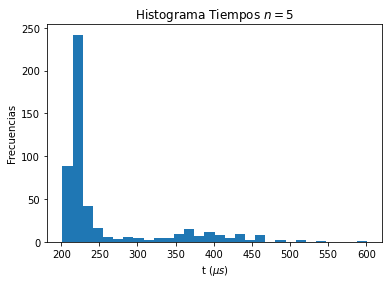

In [ ]:
plt.hist(tiempos_gaussiana[0], bins = 30)
plt.title("Histograma Tiempos $n=5$")
plt.ylabel("Frecuencias")
plt.xlabel("t ($\mu s$)")

Text(0.5, 0, 't ($\\mu s$)')

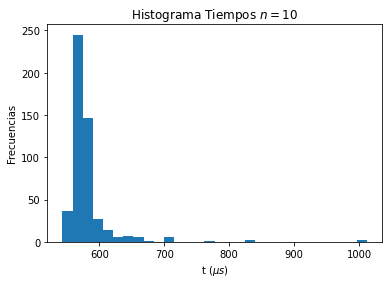

In [ ]:
plt.hist(tiempos_gaussiana[1], bins = 30)
plt.title("Histograma Tiempos $n=10$")
plt.ylabel("Frecuencias")
plt.xlabel("t ($\mu s$)")

Text(0.5, 0, 't ($\\mu s$)')

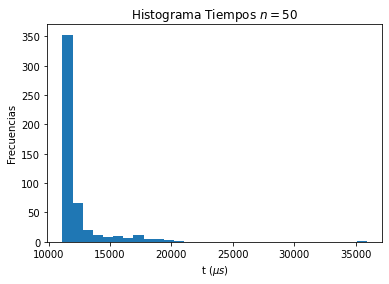

In [ ]:
plt.hist(tiempos_gaussiana[2], bins = 30)
plt.title("Histograma Tiempos $n=50$")
plt.ylabel("Frecuencias")
plt.xlabel("t ($\mu s$)")

Text(0.5, 0, 't ($\\mu s$)')

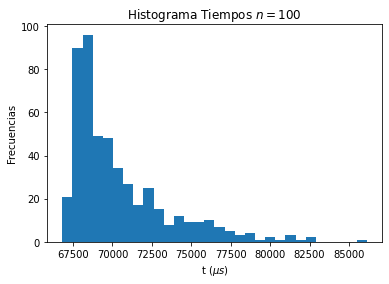

In [ ]:
plt.hist(tiempos_gaussiana[3], bins = 30)
plt.title("Histograma Tiempos $n=100$")
plt.ylabel("Frecuencias")
plt.xlabel("t ($\mu s$)")

Text(0, 0.5, 'Tiempo Medio ($\\mu s$)')

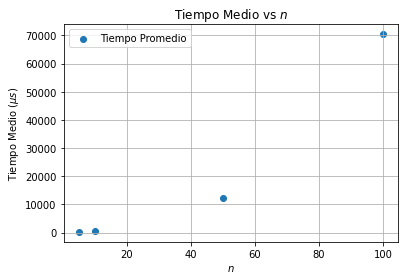

In [ ]:
t_medio_gaussiana = np.zeros(4)
for i in range(4):
  t_medio_gaussiana[i] = np.mean(tiempos_gaussiana[i])

plt.scatter(n, t_medio_gaussiana, label = "Tiempo Promedio")
plt.legend()
plt.grid()
plt.title("Tiempo Medio vs $n$")
plt.xlabel("$n$")
plt.ylabel("Tiempo Medio ($\mu s$)")

Si comparamos las graficas de $O_n(n)$ y $\bar{t}(s)$ notamos un comportamiento muy similar de los datos. Esto significa que el tiempo medio también tiene un comportamiento cubico en función del tamaño de la matriz.

Este resultado se explica mediante la linealidad. Cierta cantidad de operaciones tardan cierto tiempo en ser realizadas; por tanto si el número de operaciones a realizar tienen un comportamiento cúbico en función de $n$, el tiempo de ejecución de dichas operaciones también tiene un comportamiento cubico en función de $n$

Text(0, 0.5, '$O_n$')

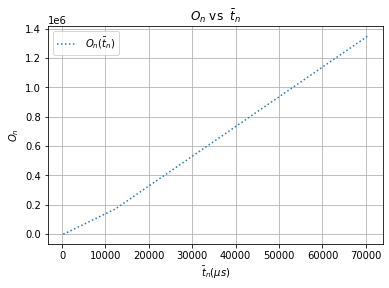

In [ ]:
plt.plot(t_medio_gaussiana, on, ":", label = "$O_n(\\bar{t}_n)$")
plt.legend()
plt.grid()
plt.title("$O_n$ vs  $\\bar{t}_n$")
plt.xlabel("$\\bar{t}_n (\mu s)$")
plt.ylabel("$O_n$")

#**EJERCICIO 3**

---



In [ ]:
tiempos_gauss_jordan = np.zeros((4, 500))
for i in range(4):
  for j in range(500):
    A,b = matriz_aleatoria(n[i])
    t_gauss_jordan = gauss_jordan(np.c_[A,b])
    tiempos_gauss_jordan[i,j] = t_gauss_jordan
tiempos_gauss_jordan = tiempos_gauss_jordan*1e6

Text(0.5, 0, 't ($\\mu s$)')

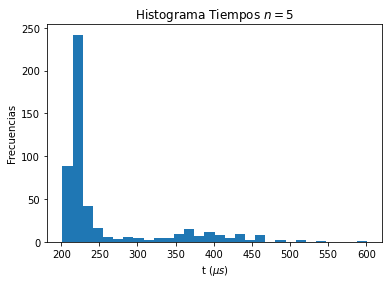

In [ ]:
plt.hist(tiempos_gaussiana[0], bins = 30)
plt.title("Histograma Tiempos $n=5$")
plt.ylabel("Frecuencias")
plt.xlabel("t ($\mu s$)")

Text(0.5, 0, 't ($\\mu s$)')

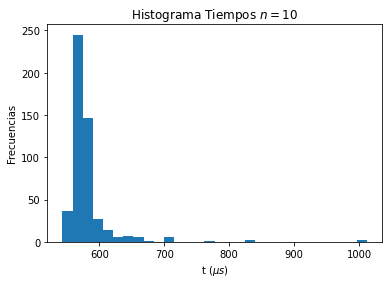

In [ ]:
plt.hist(tiempos_gaussiana[1], bins = 30)
plt.title("Histograma Tiempos $n=10$")
plt.ylabel("Frecuencias")
plt.xlabel("t ($\mu s$)")

Text(0.5, 0, 't ($\\mu s$)')

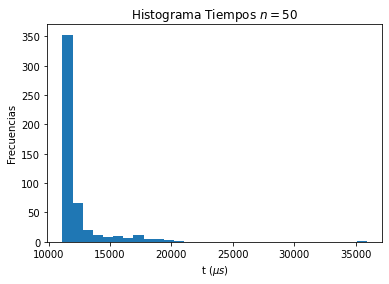

In [ ]:
plt.hist(tiempos_gaussiana[2], bins = 30)
plt.title("Histograma Tiempos $n=50$")
plt.ylabel("Frecuencias")
plt.xlabel("t ($\mu s$)")

Text(0.5, 0, 't ($\\mu s$)')

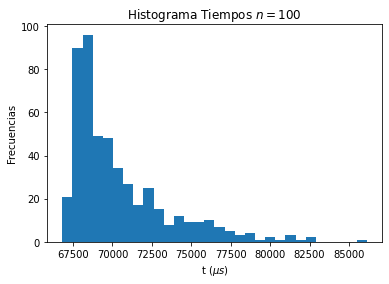

In [ ]:
plt.hist(tiempos_gaussiana[3], bins = 30)
plt.title("Histograma Tiempos $n=100$")
plt.ylabel("Frecuencias")
plt.xlabel("t ($\mu s$)")

Text(0, 0.5, 'Tiempo Medio ($\\mu s$)')

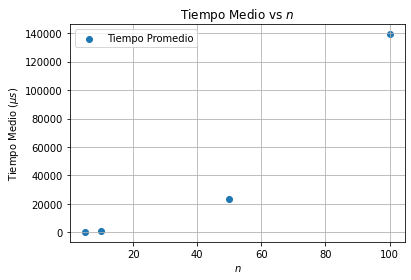

In [ ]:
t_medio_gauss_jordan = np.zeros(4)
for i in range(4):
  t_medio_gauss_jordan[i] = np.mean(tiempos_gauss_jordan[i])

plt.scatter(n, t_medio_gauss_jordan, label = "Tiempo Promedio")
plt.legend()
plt.grid()
plt.title("Tiempo Medio vs $n$")
plt.xlabel("$n$")
plt.ylabel("Tiempo Medio ($\mu s$)")

Text(0, 0.5, 'Tiempo Medio ($\\mu s$)')

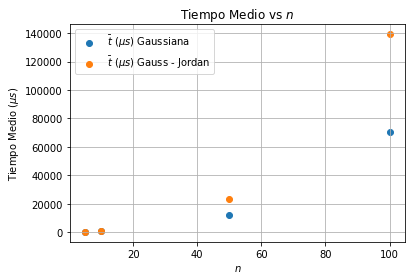

In [ ]:
plt.scatter(n, t_medio_gaussiana, label = "$\\bar{t}$ $(\\mu s)$ Gaussiana")
plt.scatter(n, t_medio_gauss_jordan, label = "$\\bar{t}$ $(\\mu s)$ Gauss - Jordan")
plt.legend()
plt.grid()
plt.title("Tiempo Medio vs $n$")
plt.xlabel("$n$")
plt.ylabel("Tiempo Medio ($\mu s$)")

Text(0, 0.5, '$\\bar{t}$ $(\\mu s)$ Gauss - Jordan')

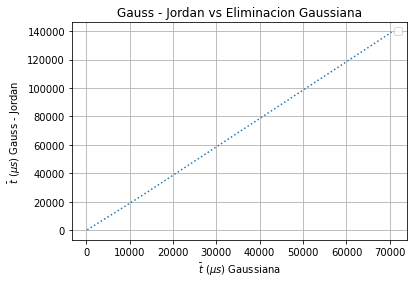

In [ ]:
plt.plot(t_medio_gaussiana, t_medio_gauss_jordan, ":")
plt.legend()
plt.grid()
plt.title("Gauss - Jordan vs Eliminacion Gaussiana")
plt.xlabel("$\\bar{t}$ $(\\mu s)$ Gaussiana")
plt.ylabel("$\\bar{t}$ $(\\mu s)$ Gauss - Jordan")

Partiendo de la supocisión de que el algoritmo de solución *Gauss - Jordan* debe realizar el doble de operaciones que el algoritmo de *Eliminación Gaussiana*, en teoría también se debería consumir el doble de tiempo de ejecución sabiendo que el tiempo de ejecución tiene una relación lineal con el número de operaciones a realizar.

Observando el grafico anterior, en el cual se muestra la relación entre el tiempo medio de ejecución de ambos algoritmos, notamos que tienen una relación lineal $2:1$, es decir que comprobamos nuestra hipotesis de que el algoritmo *Gauss - Jordan* emplea el doble de tiempo de ejecución que el algoritmo *Eliminación Gaussiana*.

#**EJERCICIO 4**

---



Sea una matriz $A_{3\times 3}$, su determinante está dado por la siguiente solución.

$$A=\begin{equation}
\begin{vmatrix}
a_{11} & a_{12}&a_{13}\\
a_{21}&a_{22}&a_{23}\\
a_{31}&a_{32}&a_{33}
\end{vmatrix}
\end{equation}$$

$$det(A)=a_{11}det\bigg(\begin{equation}
\begin{vmatrix}
a_{22}&a_{23}\\
a_{32}&a_{33}
\end{vmatrix}\bigg)
-a_{12}det\bigg(
\begin{vmatrix}
a_{21}&a_{23}\\
a_{31}&a_{33}
\end{vmatrix}\bigg)+a_{13}det\bigg(
\begin{vmatrix}
a_{21}&a_{22}\\
a_{31}&a_{32}
\end{vmatrix}\bigg)
\end{equation}$$

A partir de esta expresión podemos afirmar que para una matriz $n\times n$ se deben realizar $n$ multiplicaciones y $n-1$ sumas, es decir, requiere realizar $2n-1$ operaciones; sin embargo, esto es un analisis superficial pues es claro que en las multiplicaciones se involucran nuevos determinantes, los cuales acarrean más operaciones a analizar. 

Yendo un poco más allá, teniendo $A_{n\times n}$, los determinantes adicionales a resolver son $n$ determinantes de matrices $A_{n-1 \times n-1}$. Estos $n$ determinantes de $A_{n-1 \times n-1}$, siguiendo la logica del parrafo anterior, necesitarian $2(n-1)-1$ operaciones. En total tendríamos $n[2(n-1)-1]$ operaciones a realizar de los determinantes adicionales de $A_{n-1\times n-1}$ que junto a las $2n-1$ operaciones iniciales de $A_{n\times n}$ serían un total de $2n-1+n[2(n-1)-1]$ operaciones.

Si dichos determinantes acarrean determinantes adicionales podemos generalizar el proceso iterativo que estime el número de operaciones a realizar para cualquier $n$.

$$i=0 \hspace{1 cm}n_0=1,\hspace{1 cm} O_0=0$$

$$i=1 \hspace{1 cm} n_1=2\hspace{1cm} O_1=2n_1-1+n_1O_0$$

De este modo, la expresión general de operaciones a realizar está dado por el algoritmo iterativo:

$$n_i=i+1\hspace{1cm} O_i=2n_i-1+n_iO_{i-1}$$

Comprobemos entonces que bajo nuestro algoritmo, el número de operaciones que se deberian realizar para resolver $det(A_{3\times 3})$ es $14$

$$det(A)=a_{11}(a_{22}a_{33}-a_{23}a_{32})-a_{12}(a_{21}a_{33}-a_{23}a_{31})+a_{13}(a_{21}a_{32}-a_{22}a_{31})$$

Este determinante, desde el análisis analitico, requiere de la realización de $14$ operaciones ($9$ Multiplicaciones y $5$ Sumas)

In [ ]:
def operaciones_teorico(n):
  op = 0
  for i in range(1,n):
    n_i = i + 1
    op = 2*n_i - 1 + n_i*op
  return op

Analicemos ahora el programa construido para calcular el determinante. Nos limitaremos unicamente a las operaciones aritmeticas que realiza; es decir, sumas, multiplicaciones, y en este caso potencias.

Cuando se calculan los cofactores, notamos que se realiza una multiplicación y una potencia.

Luego al calcular el determinante se está generando un acumulador, es decir que se realiza una suma por cada iteración y además se está multiplicando por el *Menor* correspondiente que acarrea más operaciones.

En total podemos decir que, por cada iteración en el ciclo se están realizando 4 operaciones más las adicionales por los determinantes de los *Menores* correspondientes.



In [ ]:
def determinante(A):
  B = (np.copy(A)).astype('float64')
  n = len(B)
  if n == 1: 
    return B[0,0]
  det = 0
  elimina_fila = np.delete(np.arange(n),0)
  for j in range(n):
    elimina_columna = np.delete(np.arange(n),j)
    menor = B[elimina_fila,:][:,elimina_columna]
    cofactor = B[0,j]*((-1)**j)
    det += cofactor * determinante(menor)
  return det

In [ ]:
def operaciones_programa(n): #Función recursiva
  if n == 1:
    return 0
  op = 0
  for i in range(n):
    op += 4 + operaciones_programa(n-1)
  return op

Text(0, 0.5, 'Operaciones Programa')

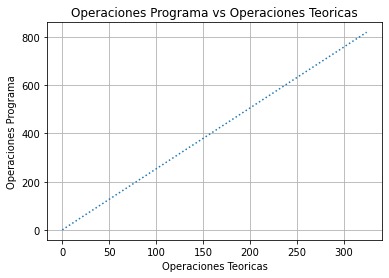

In [ ]:
n = np.arange(1,6)
op_teorico = np.zeros(5)
op_programa = np.zeros(5)
for i in range(5):
  op_programa[i] = operaciones_programa(n[i])
  op_teorico[i] = operaciones_teorico(n[i])

plt.plot(op_teorico, op_programa, ":")
plt.title("Operaciones Programa vs Operaciones Teoricas")
plt.grid()
plt.xlabel("Operaciones Teoricas")
plt.ylabel("Operaciones Programa")

Con este grafico podemos notar como se presenta una relación lineal entre el número de operaciones analiticas y el numero de operaciones que realiza el programa. Claramente el programa debe realizar muchas más operaciones, lo cual observamos es que es más del doble de operaciones que el analisis analitico. 

Si reducimos las operaciones del programa al analisis analitico, se convierten en solo dos operaciones por iteración en lugar de cuatro. Esto se debe a que ya no debemos efectuar la multiplicación ni la potencia en el calculo de los cofactores y solo nos queda la acumulación del determinante y el producto entre el cofactor y el menor. 

Analicemos ahora qué sucedería con esta reducción.

In [ ]:
def operaciones_programa(n): #Función recursiva
  if n == 1:
    return 0
  op = 0
  for i in range(n):
    op += 2 + operaciones_programa(n-1)
  return op

Text(0, 0.5, 'Operaciones Programa')

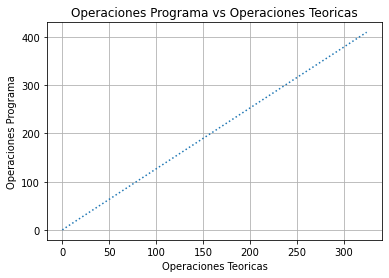

In [ ]:
n = np.arange(1,6)
op_programa = np.zeros(5)
for i in range(5):
  op_programa[i] = operaciones_programa(n[i])

plt.plot(op_teorico, op_programa, ":")
plt.title("Operaciones Programa vs Operaciones Teoricas")
plt.grid()
plt.xlabel("Operaciones Teoricas")
plt.ylabel("Operaciones Programa")

Con este cambio ahora notamos que la relación es mucho menor a $2:1$.

Notemos lo siguiente. Anteriormente dijimos que por cada iteración del ciclo *for* se estabán realizando 4 operaciones más las adicionales por los determinantes de los menores.

$$O_{n(Programa)}=4n+nO_{n-1}$$

Con la reducción al analisis analitico, obtuvimos que el numero de operaciones por iteración era 2 más las de los determinantes de los menores.

$$O_{n(Reduccion)}=2n+nO_{n-1}$$

En nuestro primer analisis, teoricamente obtuvimos la siguiente expresión.

$$O_{n(Teorica)}=2n-1+nO_{n-1}$$

Esta comparación entre las expresiones nos permite explicar el comportamiento lineal entre el número de operaciones teorico y el que realiza el programa. 

Podriamos afirmar erroneamente que $O_{n(Programa)}\approx 2O_{n(Teorica)}$ o $O_{n(Reduccion)}\approx O_{n(Teorica)}$ pues solo se diferencian en una operacion; sin embargo, notemos que dichas expresiones también dependen del numero de operaciones adicionales que se guían por su correspondiente expresión, y al extrapolar este efecto se genera que en nuestro primer grafico la relación sea mayor de $2:1$ y que en el segundo grafico sea mayor que $1:1$

In [ ]:
#Tarea 4 85/100

#1. Número medio de operaciones 10/10

#2. Histogramas Gauss 30/30
#n=5 5/5
#n=10 5/5
#n=50 10/10
#n=100 10/10

#3. Histogramas GaussJordan 30/30
#n=5 5/5
#n=10 5/5
#n=50 10/10
#n=100 10/10

#4. Contador Determinante 15/30 
#No pusiste el contador dentro de la función determinante, el analisis está bien
#Sin embargo redundas mucho.
#Solución Operaciones: 14
